In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import datasets

In This notebook, I want to introduce you to the first algorithm in the deep learning domain, which called Rosenblatt's Perceptron

Rosenblatt's Algorithm: 
 * intialize Wi's with a small random number or set it to zero
 * step two: for each observation: 
        for each input and weight predict the output(y_hat)
        based on below formula update the each weight
            wi = lr*(yi_ture - yi_hat) * xi

#### The first version of perceptron 


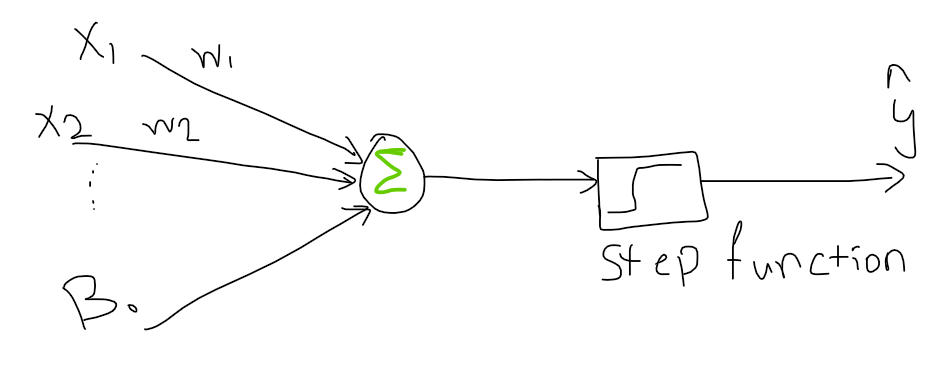

#### Ok, in this notebook we want to implement the Rosenblatt perceptron from scratch

In [2]:
# First of all we have to define activation function

def activation_function(z): 
    return(np.where(z >= 0, 1, 0))

In [3]:
# Let's implement the algorithm:

def perceptron(X, y, learning_rate = 0.01, n_epochs = 100):
    n_row, n_col = X.shape
    
    
    # initialize parameter
    weights = np.zeros(n_col)
    bais = 0
    
    
    for i in range(n_epochs):
        for idx_i, xi in enumerate(X):
            linear_sum = np.dot(xi, weights) + bais
            y_pred = activation_function(linear_sum)
            
            # update parameters
            update = learning_rate * (y[idx_i] - y_pred)
            weights = weights + (update * xi)
            bais +=  update
    return(weights, bais)

In [4]:
# Create Synthetic Dataset

features, target = datasets.make_blobs(n_samples = [50, 50], 
                                       n_features = 2, 
                                       centers = [(3, 3), (6, 6)], 
                                       cluster_std = 0.5, random_state = 123)


In [5]:
features[:5]

array([[3.4535526 , 2.28565965],
       [6.3804747 , 6.16173442],
       [2.87219031, 1.60070545],
       [6.08859616, 5.985016  ],
       [3.63296813, 2.5666298 ]])

In [6]:
target

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

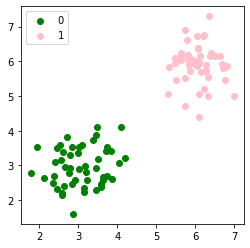

In [7]:
# Plot Our Data
cdict = {0: 'green', 1: 'pink'}
plt.figure(figsize = (4, 4))
for i in np.unique(target):
    indices = np.where(target == i)
    plt.scatter(x = features[indices, 0], y = features[indices, 1], c = cdict[i], 
                label = i, marker = "o", alpha = 1)
plt.legend()

In [8]:
# Note that: Rosenblat Algorithm only obtain the exact answer which can separate our dataset with a line or a hyperplane
# In this case, our dataset is separable

# Let's apply our algorithm to the dataset and calculate Weights

W, b = perceptron(features, target, learning_rate = 0.014, n_epochs = 100)

In [9]:
W

array([0.03001155, 0.02043384])

In [10]:
b

-0.21000000000000008

In [11]:
# We can predict our model and relize that our model how well is fitted.
# predictiction function
def predict(w, b, X):
    return(activation_function(np.dot(X, W) + b))


y_pred = predict(W, b, features)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [12]:
# We can calculate the accuracy of model
np.sum(y_pred == target)
# we got 100% accuracy

100

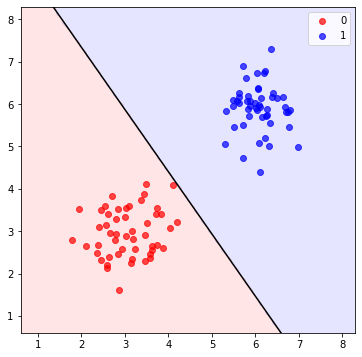

In [13]:
#Plot Data
cdict = {0: 'red', 1: 'blue'}
plt.figure(figsize = (6, 6))
for i in np.unique(target):
    indices = np.where(target == i)
    plt.scatter(x = features[indices, 0], y = features[indices, 1], c = cdict[i], label = i,
                marker = "o", alpha = 0.7)
plt.legend()

#Plot the Classifier
x1p = np.linspace(features.min() - 1, features.max() + 1, 100)
x2p = (W[0] * x1p + b) / - W[1]
plt.plot(x1p, x2p, 'k')
plt.xlim(features.min() - 1, features.max() + 1)
plt.ylim(features.min() - 1, features.max() + 1)

#Plot Regions
x1, x2 = np.meshgrid(np.linspace(features.min() - 1, features.max() + 1, 100), 
                     np.linspace(features.min() - 1, features.max() + 1, 100))
grids = np.array((x1.ravel(), x2.ravel())).T
region_color = predict(w = W, b = b, X = grids)
region_color = region_color.reshape(100, 100)
plt.contourf(x1, x2, region_color, alpha = 0.1, levels = [0, 0.5, 1], colors = ['red', 'blue'])